<a href="https://colab.research.google.com/github/RosimeireAlves/Credit-Card-Prediction_Original/blob/master/Credit_Card_Prediction_Original_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Detecção de Fraude (Cartão de Crédito) -  Deep Learning**

Projeto FMF:

Credit Card Fraud Detection

VERSÃO ORIGINAL

Credit-Card-Prediction/Fraud detection models/Credit_card_frau_detection-DNN-Sampling.ipynb


Declaração do problema:


*Qualquer empresa que utiliza cartões de crédito precisa de um sistema detecção de fraudes;

*Empresa contratam para detectar fraudes em cartões de crédito para que os clientes não sejam cobrados por itens não comprados e

*objetiva construir um classificador para informar se uma transação é fraude ou não.

ALTERAÇÃO DA PERGUNTA (ASK) visando uma pesquisa a partir dos resultados do projeto original, aqui é um projeto "semelhante" ao projeto FMF escolhido com, apresentando, uma ORIGINALIDADE segundo a abordagem sistemica AGEMC (Ask, Get, Explore, Model).

NEW ASK:
As transações serão rejeitadas somente na indicação automatizada?





##Importando DADOS
Inicia-se importando a biblioteca numpy==1.16.4 para tensorflow 1.14.0, usando o back-end do TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from collections import Counter
np.random.seed(2)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv1.txt to creditcard.csv1.txt


In [183]:
df = pd.read_csv('creditcard.csv1.txt')

In [184]:
# Cópia do dataframe

df_clean = df.copy()

In [185]:
##Olhando os dados
df.head(10)

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   
5   2.0 -0.426  0.961  1.141 -0.168  0.421 -0.030  0.476  0.260 -0.569  ...   
6   4.0  1.230  0.141  0.045  1.203  0.192  0.273 -0.005  0.081  0.465  ...   
7   7.0 -0.644  1.418  1.074 -0.492  0.949  0.428  1.121 -3.808  0.615  ...   
8   7.0 -0.894  0.286 -0.113 -0.272  2.670  3.722  0.370  0.851 -0.392  ...   
9   9.0 -0.338  1.120  1.044 -0.222  0.499 -0.247  0.652  0.070 -0.737  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0  
5 -0.208 -0.560 -0.026 -0.371 -0.233  0.106  0.254  0.081    3.67      0  
6 -0.168 -0.271 -0.154 -0.780  0.750 -0.257  0.035  0.005    4.99      0  
7  1.943 -1.015  0.058 -0.650 -0.415 -0.052 -1.207 -1.085   40.80      0  
8 -0.073 -0.268 -0.204  1.012  0.373 -0.384  0.012  0.142   93.20      0  
9 -0.247 -0.634 -0.121 -0.385 -0.070  0.094  0.246  0.083    3.68      0  

[10 rows x 31 columns]

In [186]:
#Formato: quantidade de linhas e colunas
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [187]:
##Especificando os tipos de dados das colunas:
## amont é variavel que indica a quantidade de valor gasto nas transações
## classe é variavel do tipo inteiro indica se as transações são fraudulentas = 1 ou não fraudulentas = 0
## time é a variavel que indica o tempo gasto em cada transação.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [188]:
##Resumo numerico: apenas colunas de interesse não anônimas
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

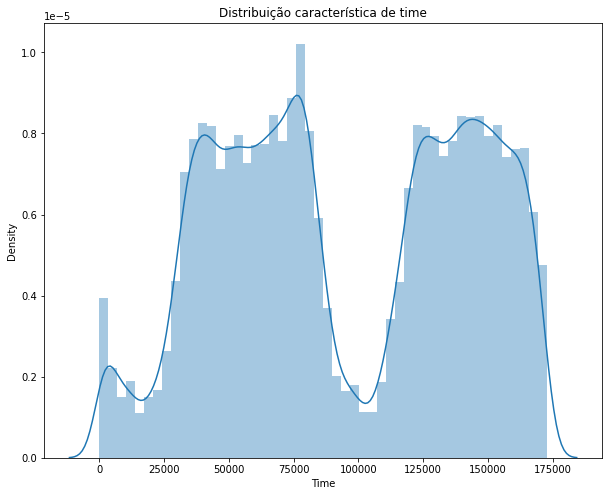

In [189]:
##Visualização de "time" e "amont"

plt.figure(figsize=(10,8))
plt.title('Distribuição característica de time')
sns.distplot(df.Time)

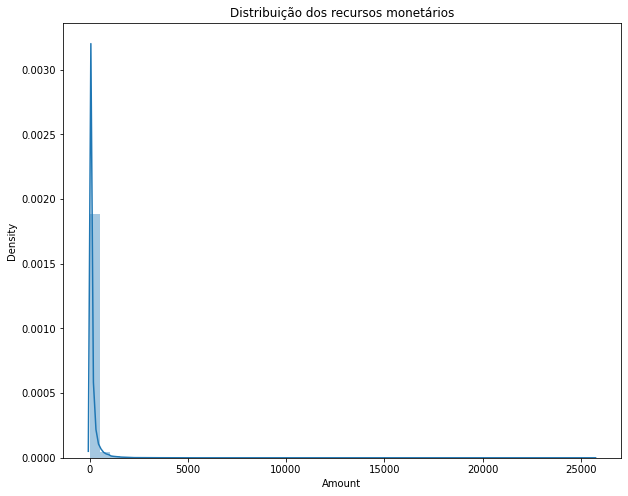

In [190]:
##Cerca de 88 $ é a média das transações com cartão de crédito neste conjunto de dados. A maior transação foi de 25.691 $
plt.figure(figsize=(10,8))
plt.title('Distribuição dos recursos monetários')
sns.distplot(df.Amount)

In [191]:
#Fraudes X transações normais
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('Havia {} transações não fraudulentas ({:.3f}%) and {} transações fraudulentas ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

Havia 284315 transações não fraudulentas (99.827%) and 492 transações fraudulentas (0.173%).


Text(0.5, 0, 'Classe (0:Não fraudulentas, 1:Fraudulentas)')

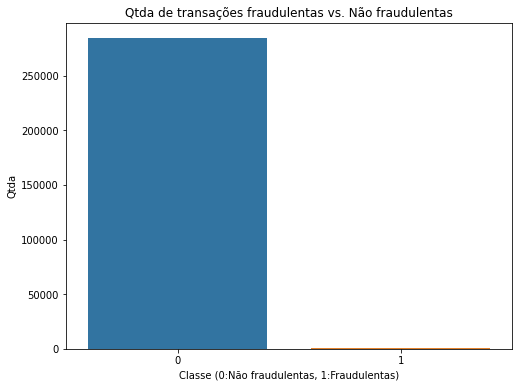

In [192]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Qtda de transações fraudulentas vs. Não fraudulentas')
plt.ylabel('Qtda')
plt.xlabel('Classe (0:Não fraudulentas, 1:Fraudulentas)')

In [193]:
##
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.136e-16 -1.228e-15 -9.215e-16  1.813e-17   
V2     -0.011  4.136e-16  1.000e+00  3.244e-16 -1.121e-15  5.158e-16   
V3     -0.420 -1.228e-15  3.244e-16  1.000e+00  4.711e-16 -6.539e-17   
V4     -0.105 -9.215e-16 -1.121e-15  4.711e-16  1.000e+00 -1.720e-15   
V5      0.173  1.813e-17  5.158e-16 -6.539e-17 -1.720e-15  1.000e+00   
V6     -0.063 -6.507e-16  2.787e-16  1.628e-15 -7.492e-16  2.408e-16   
V7      0.085 -1.005e-15  2.056e-16  4.895e-16 -4.105e-16  2.716e-16   
V8     -0.037 -2.434e-16 -5.377e-17 -1.269e-15  5.697e-16  7.437e-16   
V9     -0.009 -1.514e-16  1.978e-17  5.568e-16  6.923e-16  7.392e-16   
V10     0.031  7.388e-17 -3.991e-16  1.157e-15  2.233e-16 -5.202e-16   
V11    -0.248  2.125e-16  1.975e-16  1.577e-15  3.459e-16  7.204e-16   
V12     0.124  2.053e-16 -9.569e-17  6.310e-16 -5.626e-16  7.413e-16   
V13    -0.066 -2.426e-17  6.295e-16  2.808e-16  1.303e-16  5.887e-16   
V14    -0.099 -5.020e-16 -1.731e-16  4.740e-16  2.282e-16  6.565e-16   
V15    -0.183  3.548e-16 -4.996e-17  9.069e-16  1.378e-16 -8.720e-16   
V16     0.012  7.213e-17  1.177e-17  8.299e-16 -9.615e-16  2.246e-15   
V17    -0.073 -3.880e-16 -2.685e-16  7.615e-16 -2.700e-16  1.282e-16   
V18     0.090  3.230e-17  3.285e-16  1.510e-16 -5.104e-16  5.309e-16   
V19     0.029  1.502e-16 -7.119e-18  3.464e-16 -3.981e-16 -1.450e-16   
V20    -0.051  4.655e-16  2.507e-16 -9.316e-16 -1.857e-16 -3.554e-16   
V21     0.045 -2.457e-16 -8.480e-17  5.706e-17 -1.950e-16 -3.921e-16   
V22     0.144 -4.291e-16  1.526e-16 -1.134e-15 -6.276e-17  1.254e-16   
V23     0.051  6.169e-16  1.634e-16 -4.983e-16  9.164e-17 -8.429e-18   
V24    -0.016 -4.425e-17  1.248e-17  2.687e-19  1.585e-16 -1.149e-15   
V25    -0.233 -9.606e-16 -4.479e-16 -1.105e-15  6.071e-16  4.809e-16   
V26    -0.041 -1.581e-17  2.057e-16 -1.238e-16 -4.247e-16  4.320e-16   
V27    -0.005  1.198e-16 -4.967e-16  1.046e-15  3.977e-17  6.590e-16   
V28    -0.009  2.083e-15 -5.094e-16  9.776e-16 -2.761e-18 -5.614e-18   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1     -6.507e-16 -1.005e-15 -2.434e-16 -1.514e-16  ... -2.457e-16 -4.291e-16   
V2      2.787e-16  2.056e-16 -5.377e-17  1.978e-17  ... -8.480e-17  1.526e-16   
V3      1.628e-15  4.895e-16 -1.269e-15  5.568e-16  ...  5.706e-17 -1.134e-15   
V4     -7.492e-16 -4.105e-16  5.697e-16  6.923e-16  ... -1.950e-16 -6.276e-17   
V5      2.408e-16  2.716e-16  7.437e-16  7.392e-16  ... -3.921e-16  1.254e-16   
V6      1.000e+00  1.192e-16 -1.104e-16  4.131e-16  ...  5.833e-17 -4.705e-19   
V7      1.192e-16  1.000e+00  3.344e-16  1.123e-15  ... -2.028e-16 -8.899e-16   
V8     -1.104e-16  3.344e-16  1.000e+00  4.356e-16  ...  3.893e-16  2.027e-16   
V9      4.131e-16  1.123e-15  4.356e-16  1.000e+00  ...  1.937e-16 -7.072e-16   
V10     5.932e-17 -7.493e-17 -2.801e-16 -4.642e-16  ...  1.178e-15 -6.418e-16   
V11     1.981e-15  1.425e-16  2.487e-16  1.355e-16  ... -5.658e-16  7.773e-16   
V12     2.375e-16 -3.537e-18  1.840e-16 -1.079e-15  ...  7.301e-16  1.645e-16   
V13    -1.211e-16  1.266e-17 -2.922e-16  2.251e-15  ...  1.008e-16  6.748e-17   
V14     2.621e-16  2.608e-16 -8.599e-16  3.785e-15  ... -3.357e-16  3.740e-16   
V15    -1.531e-15 -1.691e-16  4.128e-16 -1.051e-15  ...  6.605e-17 -4.209e-16   
V16     2.624e-18  5.869e-17 -5.255e-16 -1.214e-15  ... -4.715e-16 -7.923e-17   
V17     2.016e-16  2.177e-16 -2.270e-16  1.114e-15  ... -8.231e-16 -8.743e-16   
V18     1.224e-16  7.604e-17 -3.668e-16  4.993e-16  ... -9.409e-16 -4.819e-16   
V19    -1.866e-16 -1.881e-16 -3.875e-16 -1.376e-16  ...  5.116e-16 -1.164e-15   
V20

Text(0.5, 1.0, 'Mapa de correlação')

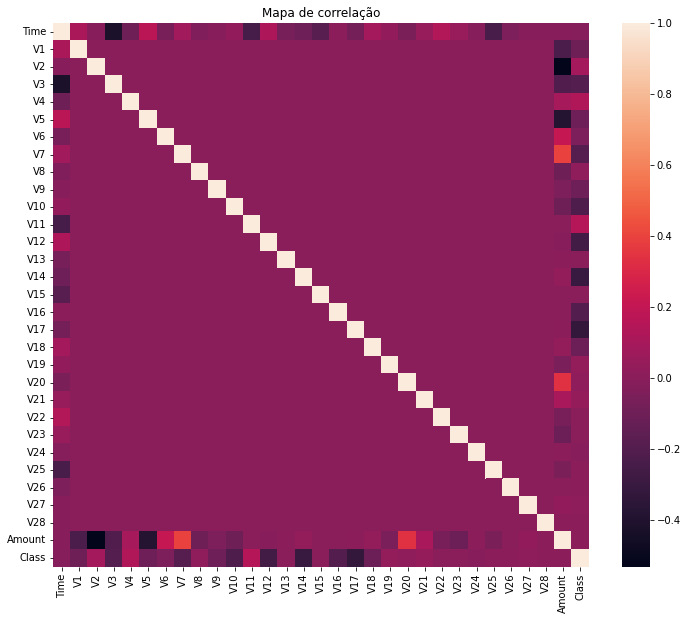

In [194]:
#Mapa de correlação
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Mapa de correlação')

In [195]:
#Distorção
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

## Entendendo erros:
## apresentando dados em escala

In [196]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [199]:
#escalando a coluna "amont"
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

##Concatenando o dataframe original com criação de novas colunas 'w' sucessivamente:

'w" indica uma variavel a ser acrescida nos dados para fazer a junção de duas ferramentas de validação do cartão de crédito:

ferramentas: endereço físico do dispositivo eletrônico onde se efetuou a compra + número de verificação do cartão (CVN);

Daí podemos acrescentar novos dados ao conjunto de dados que temos, e respondemos a pergunta no sentido de que SIM, podemos recusar uma transação baseada na informação automzatizada, que indica possível transação fraudada, porque associamos elementos físicos aos dados obtidos. É uma melhoria do sistema.

In [200]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
110167  71706.0 -1.554 -0.255  1.353  0.695  1.079  0.885 -0.252  0.380   
58609   48469.0 -1.043 -0.534  1.433 -1.057  0.157 -1.083 -0.421  0.057   
107279  70367.0 -3.515  2.892 -0.541 -1.470 -1.796 -0.732 -1.345  2.373   
126075  77920.0 -1.185 -1.053  2.525 -2.275 -0.940 -0.713 -0.907  0.237   
140539  83776.0 -0.255  1.459  1.369  2.842  0.322 -0.129  0.747  0.015   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
110167  0.186  ... -0.062 -0.561 -0.914  0.345 -0.099  0.290   44.56      0   
58609  -0.826  ...  0.090 -0.197 -0.230  0.104  0.099  0.152   19.99      0   
107279 -0.293  ...  0.279  0.254 -0.074  0.751  0.180  0.144    3.78      0   
126075 -2.001  ...  0.106  0.351  0.162 -0.293  0.298  0.151   55.00      0   
140539 -1.553  ... -0.009  0.401 -0.554  0.172  0.426  0.235    6.80      0   

        scaled_amount  scaled_time  
110167         -0.175       -0.487  
58609          -0.273       -0.976  
107279         -0.338       -0.515  
126075         -0.133       -0.356  
140539         -0.326       -0.232  

[5 rows x 33 columns]

In [201]:
#Soltando colunas antigas de "amont" e "time"

df.drop(['Amount', 'Time'], axis=1, inplace=True)

##**DIVIDINDO DADOS EM TREINO E  TESTE**

In [202]:
#separando as variáveis
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [203]:
df_clean.head(10)

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   
5   2.0 -0.426  0.961  1.141 -0.168  0.421 -0.030  0.476  0.260 -0.569  ...   
6   4.0  1.230  0.141  0.045  1.203  0.192  0.273 -0.005  0.081  0.465  ...   
7   7.0 -0.644  1.418  1.074 -0.492  0.949  0.428  1.121 -3.808  0.615  ...   
8   7.0 -0.894  0.286 -0.113 -0.272  2.670  3.722  0.370  0.851 -0.392  ...   
9   9.0 -0.338  1.120  1.044 -0.222  0.499 -0.247  0.652  0.070 -0.737  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0  
5 -0.208 -0.560 -0.026 -0.371 -0.233  0.106  0.254  0.081    3.67      0  
6 -0.168 -0.271 -0.154 -0.780  0.750 -0.257  0.035  0.005    4.99      0  
7  1.943 -1.015  0.058 -0.650 -0.415 -0.052 -1.207 -1.085   40.80      0  
8 -0.073 -0.268 -0.204  1.012  0.373 -0.384  0.012  0.142   93.20      0  
9 -0.247 -0.634 -0.121 -0.385 -0.070  0.094  0.246  0.083    3.68      0  

[10 rows x 31 columns]

In [204]:
#Divisão do teste manual usando random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256094, 31)
Test Shape: (28713, 31)


In [205]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [206]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [207]:
#Observando o resumo estatístico do dataset
df.describe()

V1         V2         V3         V4         V5         V6  \
count  2.848e+05  2.848e+05  2.848e+05  2.848e+05  2.848e+05  2.848e+05   
mean   1.168e-15  3.417e-16 -1.380e-15  2.074e-15  9.604e-16  1.487e-15   
std    1.959e+00  1.651e+00  1.516e+00  1.416e+00  1.380e+00  1.332e+00   
min   -5.641e+01 -7.272e+01 -4.833e+01 -5.683e+00 -1.137e+02 -2.616e+01   
25%   -9.204e-01 -5.985e-01 -8.904e-01 -8.486e-01 -6.916e-01 -7.683e-01   
50%    1.811e-02  6.549e-02  1.798e-01 -1.985e-02 -5.434e-02 -2.742e-01   
75%    1.316e+00  8.037e-01  1.027e+00  7.433e-01  6.119e-01  3.986e-01   
max    2.455e+00  2.206e+01  9.383e+00  1.688e+01  3.480e+01  7.330e+01   

              V7         V8         V9        V10  ...        V22        V23  \
count  2.848e+05  2.848e+05  2.848e+05  2.848e+05  ...  2.848e+05  2.848e+05   
mean  -5.556e-16  1.213e-16 -2.406e-15  2.239e-15  ... -3.569e-16  2.579e-16   
std    1.237e+00  1.194e+00  1.099e+00  1.089e+00  ...  7.257e-01  6.245e-01   
min   -4.356e+01 -7.322e+01 -1.343e+01 -2.459e+01  ... -1.093e+01 -4.481e+01   
25%   -5.541e-01 -2.086e-01 -6.431e-01 -5.354e-01  ... -5.424e-01 -1.618e-01   
50%    4.010e-02  2.236e-02 -5.143e-02 -9.292e-02  ...  6.782e-03 -1.119e-02   
75%    5.704e-01  3.273e-01  5.971e-01  4.539e-01  ...  5.286e-01  1.476e-01   
max    1.206e+02  2.001e+01  1.559e+01  2.375e+01  ...  1.050e+01  2.253e+01   

             V24        V25        V26        V27        V28       Class  \
count  2.848e+05  2.848e+05  2.848e+05  2.848e+05  2.848e+05  284807.000   
mean   4.473e-15  5.341e-16  1.683e-15 -3.660e-16 -1.227e-16       0.002   
std    6.056e-01  5.213e-01  4.822e-01  4.036e-01  3.301e-01       0.042   
min   -2.837e+00 -1.030e+01 -2.605e+00 -2.257e+01 -1.543e+01       0.000   
25%   -3.546e-01 -3.171e-01 -3.270e-01 -7.084e-02 -5.296e-02       0.000   
50%    4.098e-02  1.659e-02 -5.214e-02  1.342e-03  1.124e-02       0.000   
75%    4.395e-01  3.507e-01  2.410e-01  9.105e-02  7.828e-02       0.000   
max    4.585e+00  7.520e+00  3.517e+00  3.161e+01  3.385e+01       1.000   

       scaled_amount  scaled_time  
count      2.848e+05    2.848e+05  
mean       2.914e-17   -3.066e-16  
std        1.000e+00    1.000e+00  
min       -3.532e-01   -1.997e+00  
25%       -3.308e-01   -8.552e-01  
50%       -2.653e-01   -2.131e-01  
75%       -4.472e-02    9.372e-01  
max        1.024e+02    1.642e+00  

[8 rows x 31 columns]

In [208]:
# colocando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

V1               0.0
V17              0.0
scaled_amount    0.0
Class            0.0
V28              0.0
V27              0.0
V26              0.0
V25              0.0
V24              0.0
V23              0.0
V22              0.0
V21              0.0
V20              0.0
V19              0.0
V18              0.0
V16              0.0
V2               0.0
V15              0.0
V14              0.0
V13              0.0
V12              0.0
V11              0.0
V10              0.0
V9               0.0
V8               0.0
V7               0.0
V6               0.0
V5               0.0
V4               0.0
V3               0.0
scaled_time      0.0
dtype: float64

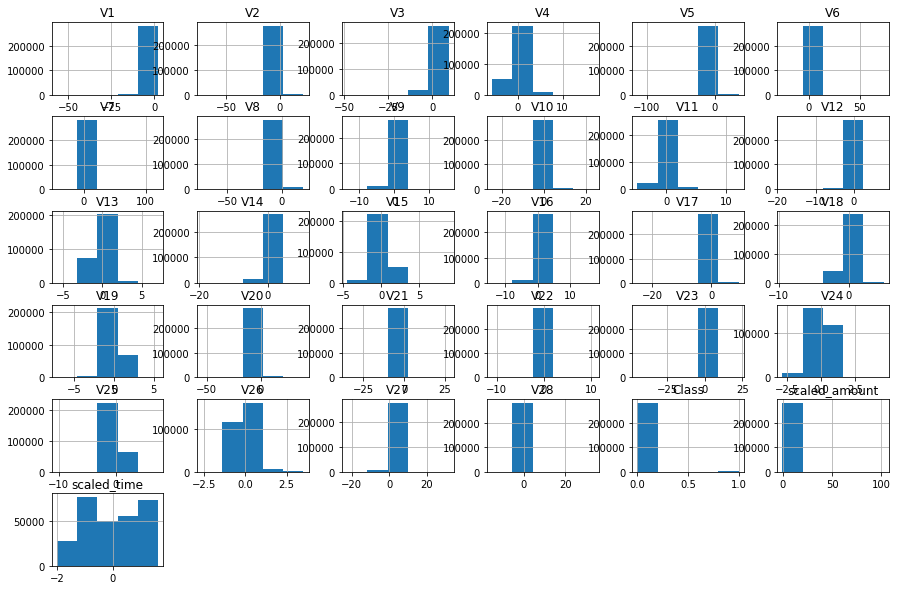

In [209]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 5, figsize=(15,10));

In [210]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**Criando um conjunto de dados de subamostra com distribuições de classes balanceadas**

In [234]:
#Quantas amostras aleatórias de distirbuições normais precisamos?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 441 fraudulent transactions in the train data.


In [235]:
##selecionando aleatoriamente 430 transações não fraudulentas aleatórias

non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [232]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
92919   1.322 -0.928 -0.155 -0.980 -0.213  1.034 -0.837  0.291 -0.432  0.598   
38893   0.987 -0.225  0.266  1.488 -0.419 -0.203  0.056  0.072  0.580 -0.109   
126092 -2.304  2.987 -0.799  0.355 -0.250 -1.063  0.745  0.050  1.728  3.580   
188661  2.093  0.701 -3.312  0.507  1.557 -1.097  0.771 -0.363 -0.336 -0.901   
6512    1.495 -0.848  0.399 -1.319 -1.167 -0.518 -0.991 -0.200 -0.914  1.226   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
92919   ... -0.346 -0.202 -1.701  0.529 -0.217  0.018 -0.006      0   
38893   ... -0.265 -0.119  0.033  0.562 -0.315  0.010  0.028      0   
126092  ...  0.436  0.237  0.334 -0.306 -0.353  1.596  0.892      0   
188661  ...  0.118 -0.111  0.204  0.449  0.682 -0.080 -0.025      0   
6512    ... -0.762  0.062 -0.083  0.302 -0.377 -0.006  0.003      0   

        scaled_amount  scaled_time  
92919          -0.113       -0.551  
38893           0.044       -1.123  
126092         -0.350       -0.235  
188661         -0.350        0.904  
6512           -0.273       -1.793  

[5 rows x 31 columns]

In [236]:
#concatenar ambos em um conjunto de dados de subamostra com distribuição igual de classe
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [237]:
subsample = pd.concat([selected, fraud])
len(subsample)

882

In [238]:
#embaralhando nosso conjunto de dados
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2      V3     V4      V5     V6      V7     V8     V9     V10  \
0   1.918  0.952  -2.059  3.834   1.668  0.770   0.232  0.108 -1.144   0.542   
1 -20.907  9.843 -19.948  6.156 -15.142 -2.240 -21.234  1.152 -8.740 -18.271   
2   2.056 -0.327  -2.752 -0.842   2.463  3.174  -0.432  0.728  0.609  -0.075   
3  -4.862 -2.723  -4.656  2.502  -2.008  0.615  -3.486  1.879 -1.116  -5.113   
4  -0.715  0.609   1.156 -0.268  -0.564 -0.619   0.698  0.070 -0.133  -1.025   
5  -0.956  2.362  -3.171  1.971   0.475 -1.903  -0.055  0.278 -1.746  -2.517   
6  -6.352 -2.370  -4.875  2.335  -0.810 -0.414  -4.082  2.239 -1.986  -5.165   
7  -2.003 -7.159  -4.051  1.310  -2.058 -0.099   2.880 -0.727  1.460  -1.532   
8  -0.614  3.699  -5.535  5.620   1.649 -2.335  -0.907  0.706 -3.748  -4.231   
9  -1.928  1.126  -4.518  1.749  -1.566 -2.010  -0.883  0.697 -2.065  -5.588   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ...  0.240 -0.112 -0.381  0.371  0.189 -0.006 -0.012      1         -0.316   
1  ...  0.653 -0.520  0.542 -0.054  0.113 -3.765 -1.071      1         -0.349   
2  ...  0.845  0.021  0.726  0.367 -0.399  0.028 -0.060      0         -0.349   
3  ...  1.034 -0.806 -1.511 -0.192  0.081  1.215 -0.923      1          2.017   
4  ...  0.239 -0.090  0.412 -0.216  0.354 -0.062  0.008      1          0.163   
5  ...  0.719  0.122 -0.256 -0.619 -0.484  0.684  0.443      1         -0.194   
6  ...  1.227 -1.485 -1.471 -0.240  0.113  0.911 -0.651      1          0.429   
7  ... -1.015 -1.801  0.658 -0.436 -0.895 -0.398  0.314      1          8.146   
8  ... -0.471 -0.076 -0.668 -0.643  0.071  0.488  0.292      1         -0.353   
9  ... -0.319  0.639 -0.295  0.538  0.788  0.293  0.148      1          1.206   

   scaled_time  
0       -0.128  
1       -1.115  
2        0.391  
3        0.958  
4       -0.372  
5        1.500  
6        0.979  
7        0.585  
8        1.244  
9        1.565  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Não fraudulentas, 1:Fraudulentas)')

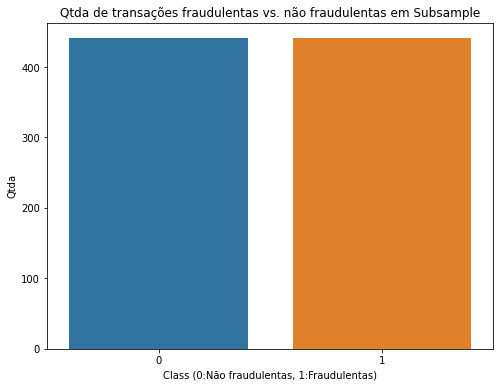

In [239]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Qtda de transações fraudulentas vs. não fraudulentas em Subsample')
plt.ylabel('Qtda')
plt.xlabel('Class (0:Não fraudulentas, 1:Fraudulentas)')

In [240]:
#Observando as correlações novamente:
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.446
V2             0.493
V3            -0.569
V4             0.712
V5            -0.387
V6            -0.379
V7            -0.475
V8             0.033
V9            -0.565
V10           -0.623
V11            0.691
V12           -0.685
V13           -0.052
V14           -0.750
V15            0.008
V16           -0.600
V17           -0.558
V18           -0.468
V19            0.295
V20            0.181
V21            0.130
V22            0.014
V23            0.012
V24           -0.078
V25            0.007
V26            0.033
V27            0.066
V28            0.072
Class          1.000
scaled_amount  0.128
scaled_time   -0.146

In [241]:
#correlações negativas < -0.5
corr[corr.Class < -0.5]

Class
V3  -0.569
V9  -0.565
V10 -0.623
V12 -0.685
V14 -0.750
V16 -0.600
V17 -0.558

In [242]:
#corelações positivas > 0.5
corr[corr.Class > 0.5]

Class
V4     0.712
V11    0.691
Class  1.000

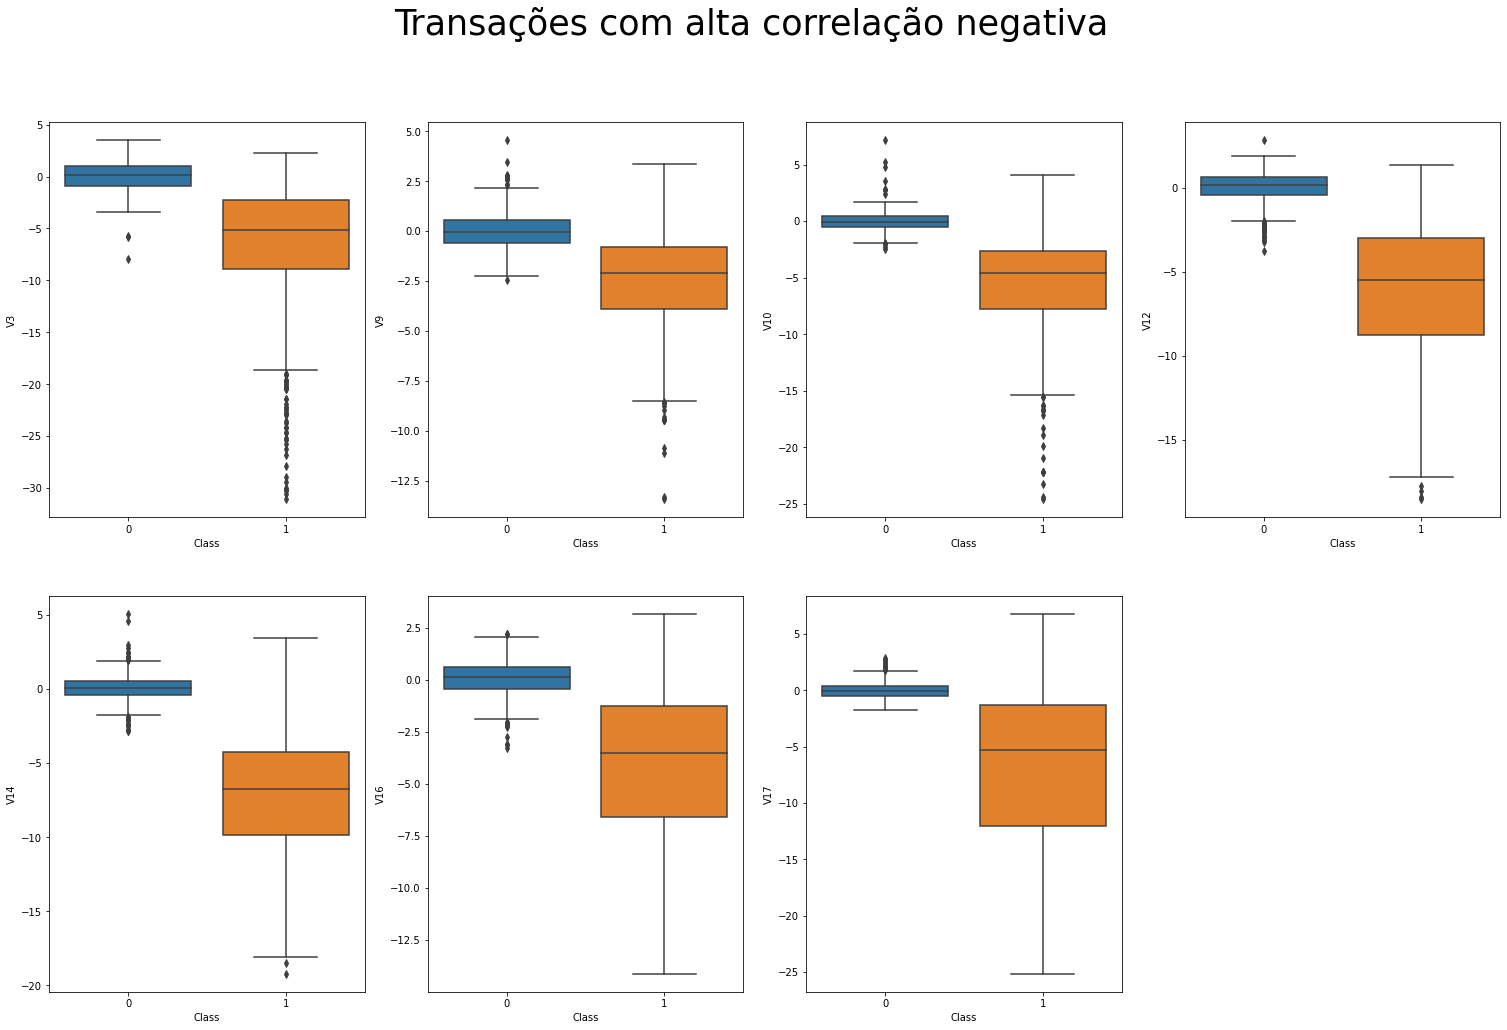

In [243]:
#visualizando os recursos com alta correlação negativa
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Transações com alta correlação negativa', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

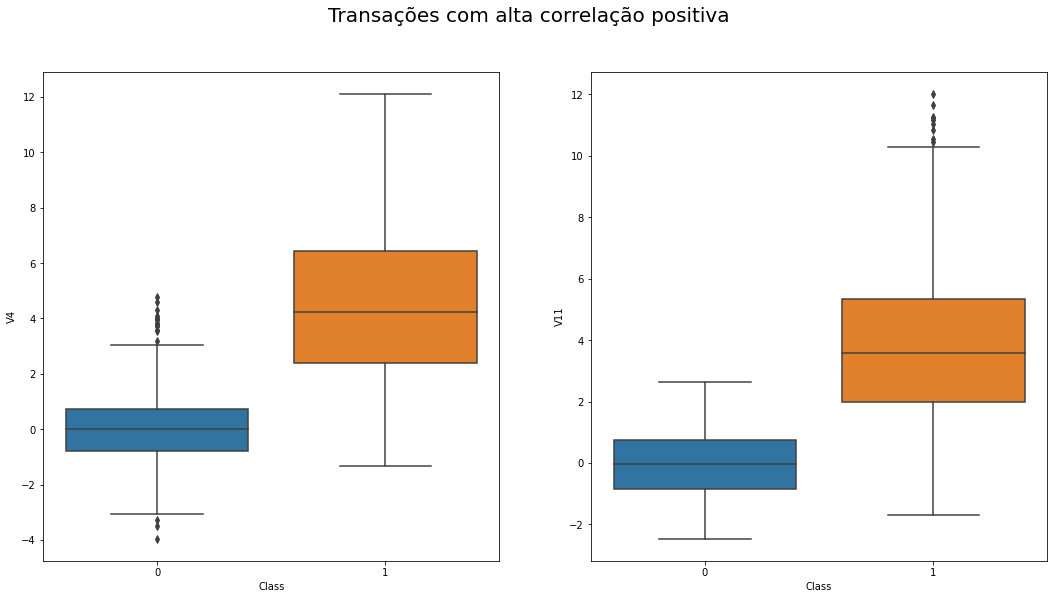

In [244]:
#visualizando os recursos com alta correlação positiva
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Transações com alta correlação positiva', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17% do dataset.



[]

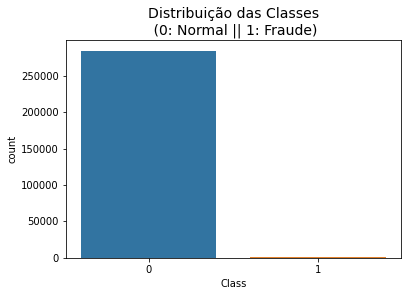

In [245]:
# balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.2f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes\n (0: Normal || 1: Fraude)', fontsize=14)
plt.plot()

*Como era esperando, estamos diante de um dataset desbalanceado e isso será um problema se não for tratado, pois a aproximadamente 99% das transações são reais.

Porém ao utilizar base de dados desbalanceada podemos induzir o algoritmo a uma análise enviesada o que impacta negativamente o modelo, inviabilizando assim o objetivo final de estimar transações fraudulentas.

In [248]:
#Criando um modelo de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [249]:
# Converter dados

train_identity = X_train.index
test_identity = X_test.index

In [250]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [251]:
## Rede Neural Profunda - Criando Modelos:

model = Sequential()
#adicionando camada de entrada
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#adicionar segunda camada oculta
model.add(Dense(units = 24, activation = 'relu'))
#adicionar camada de desistência
model.add(Dropout(0.5))
#adicionar terceira camada oculta
model.add(Dense(units = 20, activation = 'relu'))
#adicionar quarta camada oculta
model.add(Dense(units = 24, activation = 'relu'))
#adicionar camada de saída
model.add(Dense(units = 1, activation = 'sigmoid'))

In [252]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [256]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada configurando 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('rótulo verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()

In [284]:
##DIVISÃO DO TREINO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [285]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [286]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (227845, 30) (56962, 30) 

Y_shapes:
 Y_train: Y_validation:
 (227845,) (56962,)


In [287]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [294]:
## Subamostragem e modelo de teste
## A amostragem é realizada antes da divisão dos dados, o que deve ser feito em dados futuros
## desbalaceados, caso contrário, precisa ser realizada apenas no conjunto de treinos.


fraud_ind = np.array(data[data.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(data[data.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)


492
284315


In [295]:
normal_ind = data[data.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [296]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])
print(len(under_sample_ind))

984


In [297]:
under_sample_data = data.iloc[under_sample_ind, :]
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [298]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

##**REMOÇÃO DE VALORES EXTREMOS (outlier)**

In [308]:
#Removendo apenas valores extremos atipicos
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [309]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('REduzimos o tamanho dos nossos dados, de {} transações por {} transações para {} transações.'.format(len_before, len_difference, len_after))

REduzimos o tamanho dos nossos dados, de 882 transações por 256 transações para 626 transações.


##**REDUÇÃO DE DIMENSIONALIDADE**


In [310]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [311]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

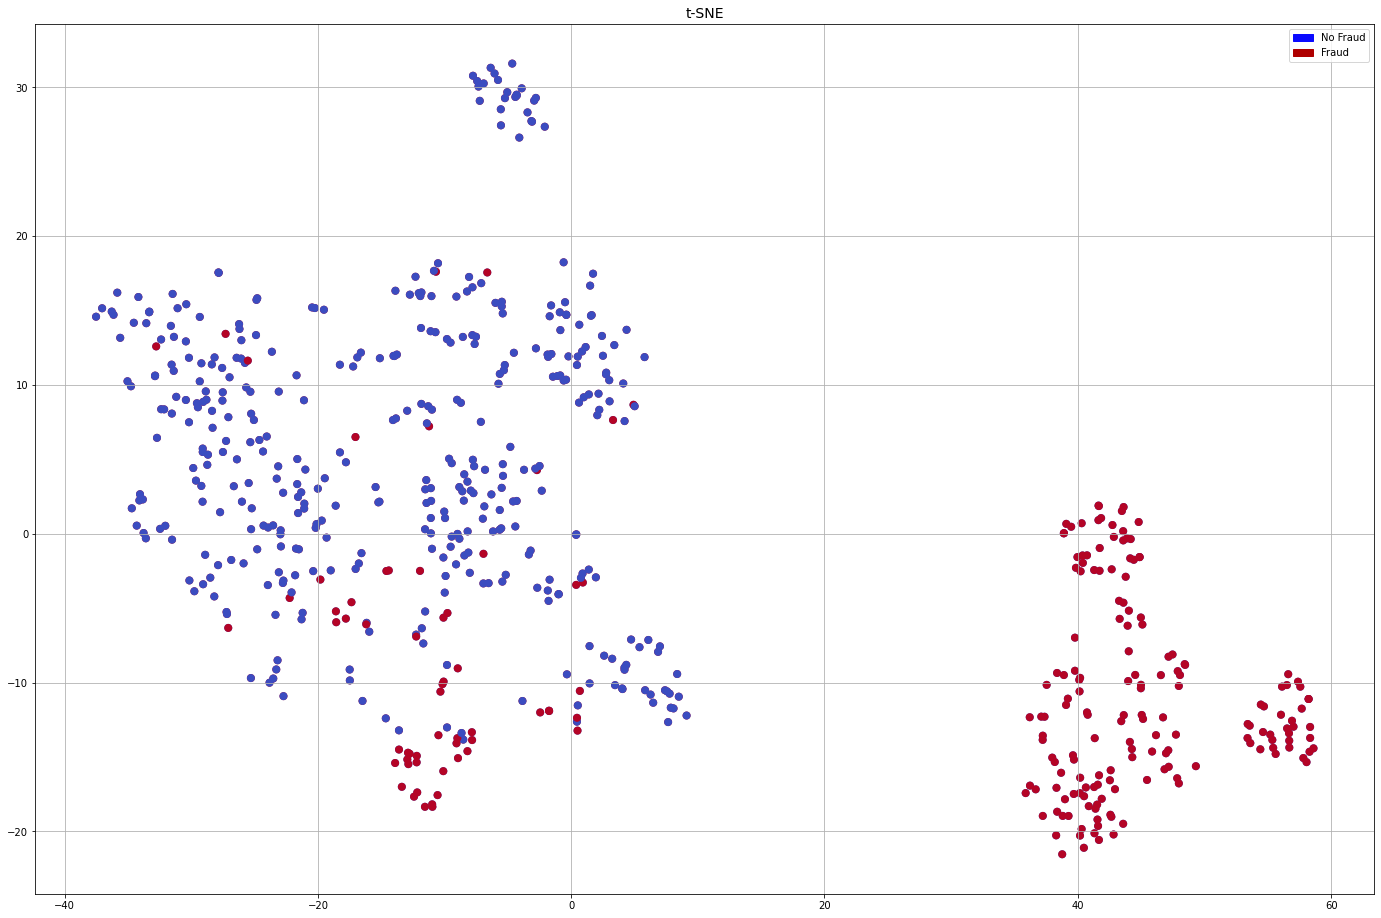

In [312]:
# Gráfico de dispersão t-SNE 
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

##**CLASSIFICAÇÃO DO ALGORITMO**

In [313]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [314]:
# divisão do teste de treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [315]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [316]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (500, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (500,) (126,)


In [317]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [320]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

##**CONCLUSÃO**

Detectar fraudes exige um planejamento cuidadoso, porque envolve um conjunto de dados sensiveis, protegidos por lei, por este motivo a maioria das 31 colunas se apresenta de forma padronizada (V1, V2, V3....). Em ciências de dados isto é extremamente importante porque podemos agregar diversos tipos de informações e garantir anonimização das informações. As instituições que detém estes dados podem ter acesso a informações particularizadas a partir do aprendizado de máquina, isto aumentaria muito a prevenção de dados ao cruzar o conteúdo emitido pelo aprendizdo de máquina com os conteúdos identificados. Essencial na detecção de fraudes são técnicas que permitem reduzir os dados e ampliar.

---



##**Referências Bibliográficas**
MIHIR JHAVERI .Credit Card Fraud Detection. Disponível em:[https://www.kaggle.com/code/mihirjhaveri/credit-card-fraud-detection/notebook]. Acesso em 01/09/2022.

Luke Sun. Detecção de fraude de cartão de crédito. Disponível em: {https://towardsdatascience.com/credit-card-fraud-detection-9bc8db79b956]. Acesso em: 01/09/2022/

Dados baixados de: [https://drive.google.com/file/d/1TXUhOXKqzFRyav4AGNnK04HJjncYe48A/view] Acesso em: 14/09/2022

